# DATA_515_HW1
#### Win Nawat Suvansinpan 1873739

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

#### 1. Read the CSV file into a pandas dataframe.

In [2]:
# reading the CSV file

df_data = pd.read_csv('../data/Fremont_Bridge_Hourly_Bicycle_Counts_by_Month_October_2012_to_present.csv')

In [3]:
df_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


In [4]:
df_data.dtypes

Date                             object
Fremont Bridge East Sidewalk    float64
Fremont Bridge West Sidewalk    float64
dtype: object

In [5]:
# Formatting the 'Date' column into datetime format

df_data['Date'] = pd.to_datetime(df_data['Date'])

In [6]:
# verify datatypes

df_data.dtypes

Date                            datetime64[ns]
Fremont Bridge East Sidewalk           float64
Fremont Bridge West Sidewalk           float64
dtype: object

In [7]:
df_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2019-03-31 23:00:00,6.0,10.0
1,2019-03-31 22:00:00,7.0,14.0
2,2019-03-31 21:00:00,18.0,15.0
3,2019-03-31 20:00:00,26.0,31.0
4,2019-03-31 19:00:00,30.0,58.0


In [8]:
df_data.shape

(56904, 3)

#### 2. Add columns to the dataframe containing
1. The total (East + West) bicycle count
2. The hour of the day
3. The year

In [9]:
# 2. adding custom columns
# 2.(i) total east + west bicycle count

df_data['total'] = df_data['Fremont Bridge East Sidewalk'] + df_data['Fremont Bridge West Sidewalk']

In [10]:
df_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total
0,2019-03-31 23:00:00,6.0,10.0,16.0
1,2019-03-31 22:00:00,7.0,14.0,21.0
2,2019-03-31 21:00:00,18.0,15.0,33.0
3,2019-03-31 20:00:00,26.0,31.0,57.0
4,2019-03-31 19:00:00,30.0,58.0,88.0


In [11]:
# 2.(ii) hour of day
# extracting the hour of the day
df_data['hour-of-day'] = df_data['Date'].dt.hour

In [12]:
# 2.(iii) year
# extracting the year
df_data['year'] = df_data['Date'].dt.year

In [13]:
df_data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,hour-of-day,year
0,2019-03-31 23:00:00,6.0,10.0,16.0,23,2019
1,2019-03-31 22:00:00,7.0,14.0,21.0,22,2019
2,2019-03-31 21:00:00,18.0,15.0,33.0,21,2019
3,2019-03-31 20:00:00,26.0,31.0,57.0,20,2019
4,2019-03-31 19:00:00,30.0,58.0,88.0,19,2019


#### 3. Create a dataframe with the subset of data from the year 2016

In [14]:
# 3. Taking only data from 2016
# Create a mask of only rows with 2016 as 'year'

df_data['year'] = pd.to_numeric(df_data['year'])
mask_2016 = df_data['year'] == 2016

In [15]:
# sum(mask_2016)
# df_data.describe()

In [16]:
# use the mask to subset data

df_data_2016 = df_data[mask_2016]

In [17]:
df_data_2016.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,hour-of-day,year
19680,2016-12-31 23:00:00,4.0,4.0,8.0,23,2016
19681,2016-12-31 22:00:00,7.0,8.0,15.0,22,2016
19682,2016-12-31 21:00:00,4.0,6.0,10.0,21,2016
19683,2016-12-31 20:00:00,3.0,6.0,9.0,20,2016
19684,2016-12-31 19:00:00,6.0,4.0,10.0,19,2016


#### 4. Use pandas + matplotlib to plot the counts by hour

In [18]:
# group by hour of day, aggregate by sum to get total counts for each hour

df_q4_agg = df_data_2016.groupby('hour-of-day').agg(['sum']).reset_index()

In [19]:
df_q4_agg.head()

,hour-of-day,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,year
,,sum,sum,sum,sum
0,0,1708.0,2202.0,3910.0,737856
1,1,907.0,1118.0,2025.0,737856
2,2,527.0,738.0,1265.0,737856
3,3,383.0,398.0,781.0,737856
4,4,1222.0,1018.0,2240.0,737856


In [20]:
plot = df_q4_agg.plot(x='hour-of-day', y='total',kind="bar", figsize=(10,6), title='Total daily counts vs hour-of-day')

#### 5. Use pandas to determine what is (on average) the busiest hour of the day
This is obtained by taking the average bicycle counts of each hour of the day.

In [21]:
# group by hour of day, aggregare by average to find the average bike count for each hour of day

df_q5_agg = df_data_2016.groupby('hour-of-day').agg(['mean']).reset_index()

In [22]:
df_q5_agg.head()

,hour-of-day,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,year
,,mean,mean,mean,mean
0,0,4.666667,6.016393,10.683060,2016
1,1,2.478142,3.054645,5.532787,2016
2,2,1.443836,2.021918,3.465753,2016
3,3,1.046448,1.087432,2.133880,2016
4,4,3.338798,2.781421,6.120219,2016


In [23]:
# sort the aggregated data and show the top 3 values

df_q5_agg.sort_values([('total', 'mean')], ascending = False).iloc[:3,:]

,hour-of-day,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,total,year
,,mean,mean,mean,mean
17,17,115.483607,283.549180,399.032787,2016
8,8,213.002732,118.795082,331.797814,2016
18,18,90.754098,171.967213,262.721311,2016


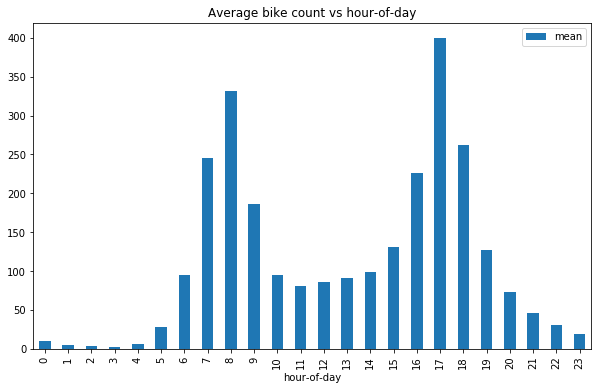

In [24]:
# visualizing the aggregated data

plot = df_q5_agg.plot(x='hour-of-day', y='total',kind="bar", figsize=(10,6), title='Average bike count vs hour-of-day')

It appears that the hour with with highest average bike count is '17'. Therefore, the busiest hour is 5pm.